Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pichu


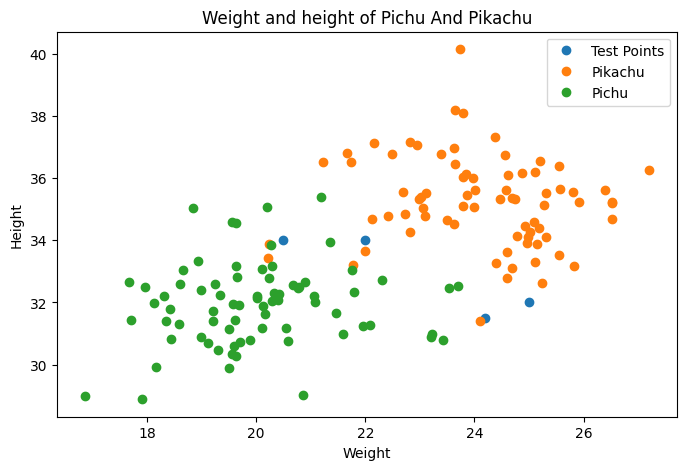

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Här skapar jag en Pokemon Data som en Tuple där jag sedan med koden under kommer spara in all information som namnen Pichu och Pickachu, Vad deras längd Data är och Bredd Data, 
Pokemon_Data = []

with open (r"C:\Code\Data\datapoints.txt", "r") as Datapoints:
    for Data in Datapoints:
        #Denna delen får jag ut alla titlar till pokemonsen  så jag kan spara höjden, bredden och titeln på pokemonen och skapar en klass för det 
        Tal = Data.strip().split(',')
        if len(Tal) == 3:
            width = float(Tal[0])
            height = float(Tal[1])
            Pokemon = int(Tal[2])
            Pokemon_Data.append((width, height, Pokemon))

#Här får jag då ut att all information och sparar det under sin klass
width_pichu = [w for w, h, l in Pokemon_Data if l == 0]
height_pichu = [h for w, h, l in Pokemon_Data if l == 0]

width_pikachu = [w for w, h, l in Pokemon_Data if l == 1]
height_pikachu = [h for w, h, l in Pokemon_Data if l == 1]

Test_points = [
    (25, 32),
    (24.2, 31.5),
    (22, 34),
    (20.5, 34)
]

# Calculate distances and determine closest Pokémon
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]  # Corrected to take the first k indices
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote, most common labels
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
X_train = [(w, h) for w, h, l in Pokemon_Data]
y_train = [l for w, h, l in Pokemon_Data]

knn = KNN(k=1)
knn.fit(np.array(X_train), np.array(y_train))

predictions = knn.predict(np.array(Test_points))

for test_point, prediction in zip(Test_points, predictions):
    pokemon_name = "Pichu" if prediction == 0 else "Pikachu"
    print(f"Sample with (width, height): {test_point} classified as {pokemon_name}")



plt.figure(figsize=(8,5), dpi =100)
plt.title("Weight and height of Pichu And Pikachu")
plt.xlabel("Weight")
plt.ylabel("Height")
test_x, test_y = zip(*Test_points)
plt.plot(test_x, test_y, "o", label='Test Points')
plt.plot(width_pikachu, height_pikachu, "o", label=("Pikachu"))
plt.plot(width_pichu, height_pichu, "o", label=("Pichu"))

plt.legend()

Sample with (width, height): (23.0, 31.0) classified as Pichu


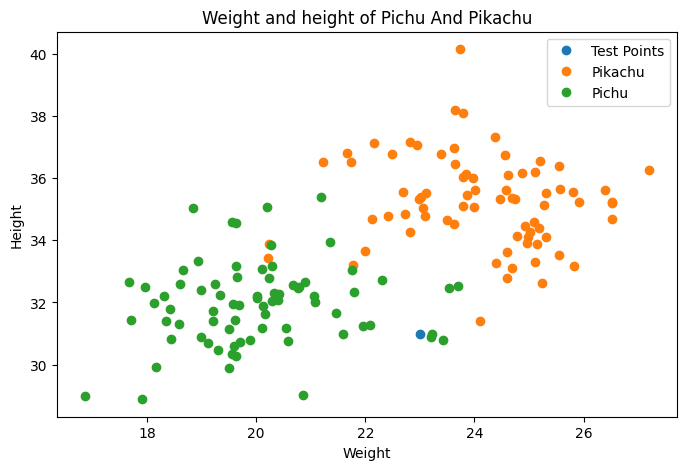

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# En tuple där vi sparar in pokemonens data som height, bredd och namn
Pokemon_Data = []

with open (r"C:\Code\Data\datapoints.txt", "r") as Datapoints:
    for Data in Datapoints:
        #får jag ut all informationen från filen datapoints och seperar all information till rätt klass
        Tal = Data.strip().split(',')
        if len(Tal) == 3:
            width = float(Tal[0])
            height = float(Tal[1])
            Pokemon = int(Tal[2])
            Pokemon_Data.append((width, height, Pokemon)) #sparar in informationen in i Pokemon Data tupeln

#Här sparar jag in rätt information till rätt klass
width_pichu = [w for w, h, l in Pokemon_Data if l == 0]
height_pichu = [h for w, h, l in Pokemon_Data if l == 0]

width_pikachu = [w for w, h, l in Pokemon_Data if l == 1]
height_pikachu = [h for w, h, l in Pokemon_Data if l == 1]

#Denna funktionen skapar jag en egen testpunk
def test_point():
    test_points = []
    while True:
        user_input = input("Enter a test point as 'width,height")
        try:
            width, height = map(float, user_input.split(','))
            if width < 0 or height < 0:
                raise ValueError
            test_points.append((width, height))
            break
        except ValueError as err:
            print("Try again, remember the widith and height need to have ',' inbetween and it has to only be positive numbers")
    return test_points

# Get custom test points
Test_points = test_point()

# Calculate distances and determine closest Pokémon
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]  # Corrected to take the first k indices
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote, most common labels
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
X_train = [(w, h) for w, h, l in Pokemon_Data]
y_train = [l for w, h, l in Pokemon_Data]

knn = KNN(k=1)
knn.fit(np.array(X_train), np.array(y_train))

predictions = knn.predict(np.array(Test_points))

for test_point, prediction in zip(Test_points, predictions):
    pokemon_name = "Pichu" if prediction == 0 else "Pikachu"
    print(f"Sample with (width, height): {test_point} classified as {pokemon_name}")
        




plt.figure(figsize=(8,5), dpi =100)
plt.title("Weight and height of Pichu And Pikachu")
plt.xlabel("Weight")
plt.ylabel("Height")
test_x, test_y = zip(*Test_points)
plt.plot(test_x, test_y, "o", label='Test Points')
plt.plot(width_pikachu, height_pikachu, "o", label=("Pikachu"))
plt.plot(width_pichu, height_pichu, "o", label=("Pichu"))

plt.legend()